In [ ]:
'''Question 1
Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and
materials.
Occupations
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called users
Step 4. Discover what is the mean age per occupation
Step 5. Discover the Male ratio per occupation and sort it from the most to the least
Step 6. For each occupation, calculate the minimum and maximum ages
Step 7. For each combination of occupation and sex, calculate the mean age
Step 8. For each occupation present the percentage of women and men
'''
#step1
import pandas as pd

#step2 and 3
users = pd.read_csv('question1.txt', sep='|', header=0)

#step4
users.groupby('occupation').mean()

#step5
male_ratio = users.pivot_table(index='occupation', columns='gender', aggfunc='size', fill_value=0)
sums = male_ratio[['F', 'M']].sum(axis=1)
male_ratio['MaleRatio'] = round(100 * male_ratio['M'] / sums , 1)
male_ratio['MaleRatio'].sort_values(ascending=False)

#step6
users.groupby('occupation').age.agg(['min', 'max'])

#step7
users.groupby(['occupation', 'gender']).age.mean()

#step8
occup_gender = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})
occup_count = users.groupby(['occupation']).count()

val = occup_gender.div(occup_count, level = "occupation")*100
val.loc[:, 'gender']

In [ ]:
'''Question 2
Euro Teams
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called euro12
Step 4. Select only the Goal column
Step 5. How many team participated in the Euro2012?
Step 6. What is the number of columns in the dataset?
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them
to a dataframe called discipline
Step 8. Sort the teams by Red Cards, then to Yellow Cards
Step 9. Calculate the mean Yellow Cards given per Team
Step 10. Filter teams that scored more than 6 goals
Step 11. Select the teams that start with G
Step 12. Select the first 7 columns
Step 13. Select all columns except the last 3
Step 14. Present only the Shooting Accuracy from England, Italy and Russia'''

#step1
import pandas as pd
import numpy as np

#step2 and 3
euro12 = pd.read_csv('Euro_2012_stats_TEAM.csv', header=0)

#step4
euro12.Goals

#step5
obs = euro12.Team.nunique()
print("Number of participating teams = ", obs)
#or obs = euro12.shape[0]

#step6
col = euro12.shape[1]
print("Number of columns = ", col)

#step7
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

#step8
discipline = discipline.sort_values(['Red Cards', 'Yellow Cards'])
discipline

#step9
mean_yellow = discipline['Yellow Cards'].sum() / len(discipline['Yellow Cards'])
print("Mean yellow cards given per team = ", mean_yellow)
#or mean_yellow = discipline['Yellow Cards'].mean()

#step10
rslt_df = euro12[euro12['Goals'] > 6]
rslt_df

#step11
euro12[euro12.Team.str.startswith('G')]

#step12
euro12.iloc[: , 0:7]

#step13
euro12.iloc[:, :-3]

# or all_except3 = euro12.drop(['Subs on', 'Subs off', 'Players Used'], axis=1)
             
#step14
euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']), ['Team','Shooting Accuracy']]

In [ ]:
'''Question 3
Housing
Step 1. Import the necessary libraries
Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000
Step 3. Create a DataFrame by joinning the Series by column
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it
to 'bigcolumn'
Step 6. Ops it seems it is going only until index 99. Is it true?
Step 7. Reindex the DataFrame so it goes from 0 to 299
'''

#step1
import numpy as np
import pandas as pd
import random

#step2
A = pd.Series(np.random.randint(1,5,100))
B = pd.Series(np.random.randint(1,4,100))
C = pd.Series(np.random.randint(10000,30000,100))

#or A = pd.DataFrame(np.random.randint(1,4,size=(100, 1)), columns=list('A'))
#or B = pd.DataFrame(np.random.randint(1,3,size=(100, 1)), columns=list('B'))
#or C = pd.DataFrame(np.random.randint(10000,30000,size=(100, 1)), columns=list('C'))

#step3
frames = [A, B, C]
horizontal_stack = pd.concat(frames, axis=1)
horizontal_stack

#step4
horizontal_stack.columns = ['bedrs','bathrs','price_sqr_meter']
horizontal_stack

#step5
bigcolumn = pd.concat(frames,axis=0)
bigcolumn

#step6
print("Length of bigcolumn = ",len(bigcolumn))

#step7
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn

In [52]:
'''Question 4
Wind Statistics
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or
other looping construct.
The data in 'wind.data' has the following format:
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL
MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71
The first three columns are year, month, and day. The remaining 12 columns are
average windspeeds in knots at 12 locations in Ireland on that day.
Step 1. Import the necessary libraries
Step 2. Import the dataset from the attached file wind.txt
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper
datetime index.
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it
and apply it.
Step 5. Set the right dates as the index. Pay attention at the data type, it should be
datetime64[ns].
Step 6. Compute how many values are missing for each location over the entire
record.They should be ignored in all calculations below.
Step 7. Compute how many non-missing values there are in total.
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and
all the times.
A single number for the entire dataset.
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean
windspeeds and standard deviations of the windspeeds at each location over all the
days
A different set of numbers for each location.
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean
windspeed and standard deviations of the windspeeds across all the locations at each
day.
A different set of numbers for each day.
Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.
Step 12. Downsample the record to a yearly frequency for each location.
Step 13. Downsample the record to a monthly frequency for each location.
Step 14. Downsample the record to a weekly frequency for each location.
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the
windspeeds across all locations for each week (assume that the first week starts on
January 2 1961) for the first 52 weeks.'''


#step1
import pandas as pd
import numpy as np
import datetime as dt

#step2 
data = pd.read_csv('wind.txt', sep="\s+")

#step3
data["Date"] = pd.to_datetime(data[["Yr","Mo","Dy"]].astype(str).agg('-'.join, axis=1))
data = data.drop(columns=["Yr","Mo","Dy"])
data.head()

#step4
data["Date"] = np.where(pd.DatetimeIndex(data["Date"]).year < 2000,data.Date,data.Date - pd.offsets.DateOffset(years=100))

#step5
newData = data.set_index("Date")
newData.index.astype("datetime64[ns]")

#step6
miss_val = newData.isnull().values.ravel().sum()
print("Missing values = ", miss_val)

#step7
x=newData.count()
print("Total Non-missing values are :",x.sum())

#step8
y = newData.mean()
y.mean()

#step9
def stats(x):
    x = pd.Series(x)
    Min = x.min()
    Max = x.max()
    Mean = x.mean()
    Std = x.std()
    res = [Min,Max,Mean,Std]
    indx = ["Min","Max","Mean","Std"]
    res = pd.Series(res,index=indx)
    return res
loc_stats = newData.apply(stats)
loc_stats

#step10
day_stats = newData.apply(stats,axis=1)
day_stats.head()

#step11
january_data = newData[newData.index.month == 1]
print ("January windspeeds:")
print (january_data.mean())

#step12
print( "Yearly:\n", newData.resample('A').mean())

#step13
print ("Monthly:", newData.resample('M').mean())

#step14
print ("Weekly:", newData.resample('W').mean())

#step15
first_year = newData[newData.index.year == 1961]
stats1 = newData.resample('W').mean().apply(lambda x: x.describe())
print (stats1)



              RPT         VAL         ROS         KIL         SHA         BIR  \
count  940.000000  940.000000  940.000000  940.000000  939.000000  940.000000   
mean    12.365304   10.647725   11.661255    6.309334   10.455607    7.094787   
std      3.466600    3.372501    2.840361    2.186432    3.146715    2.556633   
min      3.874286    2.452857    4.901429    1.447143    2.775714    1.382857   
25%      9.884286    8.277857    9.613929    4.742857    8.248571    5.211071   
50%     12.291429   10.486429   11.490000    6.165714   10.254286    6.933571   
75%     14.547143   12.757857   13.457143    7.584286   12.627143    8.842500   
max     24.010000   23.715714   21.384286   14.517143   22.897143   16.010000   

              DUB         CLA         MUL         CLO         BEL         MAL  
count  940.000000  940.000000  940.000000  940.000000  940.000000  940.000000  
mean     9.801271    8.496123    8.496452    8.710639   13.125912   15.597171  
std      3.308180    2.853029 

In [65]:
'''Question 5
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called chipo.
Step 4. See the first 10 entries
Step 5. What is the number of observations in the dataset?
Step 6. What is the number of columns in the dataset?
Step 7. Print the name of all the columns.
Step 8. How is the dataset indexed?
Step 9. Which was the most-ordered item?
Step 10. For the most-ordered item, how many items were ordered?
Step 11. What was the most ordered item in the choice_description column?
Step 12. How many items were orderd in total?
Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type
Step 14. How much was the revenue for the period in the dataset?
Step 15. How many orders were made in the period?
Step 16. What is the average revenue amount per order?
Step 17. How many different items are sold?'''

#step1
import pandas as pd

#step2 and 3
chipo = pd.read_csv('chipotle.tsv', sep='\t', header=0)

#step4
result = chipo.head(10)
print("First 10 rows of the DataFrame:")
print(result)

#step5
obs = chipo.shape[0]
print("Number of observations = ", obs)

#step6
col = chipo.shape[1]
print("Number of columns = ", col)

#step7
col_name = chipo.columns.values
#or col_name = chipo.head()
print("Column Names : ", col_name)

#step8
ind = chipo.index
print("Indexing : ", ind)

#step9
most_ordered = chipo.groupby(['item_name']).quantity.sum().sort_values(ascending = False).index[0]
#or most_ordered = chipo['item_name'].mode()
print("Most ordered item : ", most_ordered)

#step10
count_most_ordered = chipo.groupby(['item_name']).quantity.sum().sort_values(ascending = False).values[0]
print(count_most_ordered, " items were ordered")

#step11
choice_desc = chipo.groupby(['choice_description']).quantity.sum().sort_values(ascending = False).index[0]
print(choice_desc, "was the most ordered item in choice_description column")

#step12
tot_orders = chipo.quantity.sum()
print("Total ordered items = ", tot_orders)

#step13
#checking item_price type
chipo["item_price"] = [float(str(i).replace("$", "")) for i in chipo["item_price"]]
chipo.item_price.dtype
chipo.item_price_float = chipo.item_price.apply(lambda x: float(x))
chipo.item_price_float.dtypes

#step14
total_rev = (chipo['item_price'] * chipo['quantity']).sum()
print("Total revenue = ${}".format(total_rev))

#step15
total_order = chipo.order_id.nunique()
#or chipo.order_id.value_counts().count()
print("Orders made in this period = ", total_order)

#step16
#avg_rev = chipo.groupby(by=['order_id']).sum().mean()['revenue']
avg_rev = total_rev/total_order
print("Average revenue amount per order = ", avg_rev)

#step17
uni_items = chipo.item_name.nunique()
#or uni_items = chipo.item_name.value_counts().count
print("Number of different items sold = ", uni_items)

First 10 rows of the DataFrame:
   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   

C:\Users\ritij\AppData\Local\Temp/ipykernel_22640/1436772607.py:73: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [ ]:
'''Question 6
Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!'''

import seaborn as sns
import pandas as pd

df = pd.read_csv('us-marriages-divorces-1867-2014.csv', header=0)

df = df[(df['Year']>=1867) & (df['Year']<=2014)]


df.plot(x="Year", y=["Marriages_per_1000", "Divorces_per_1000"], kind="line")
ax.set_title("Number of marriages and divorces per capita in the US")
ax.legend(df)



In [ ]:
'''
Question 7
Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

capita = pd.read_csv('us-marriages-divorces-1867-2014.csv') #read csv into dataframe and specify column names


capita = capita[(capita['Year']==1900) | (capita['Year']==1950)  | (capita['Year']==2000)]

ax.set_title("Mariages vs Divorces per capita")
colours = ['#F8B195','#F67280','#C06C84','#6C5B7B','#355C7D']
capita.plot(x="Year", y=["Marriages_per_1000", "Divorces_per_1000"], kind="bar")

In [ ]:
'''Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

actors = pd.read_csv('actor_kill_counts.csv') 

actors.sort_values(by='Count').plot(x="Actor", y="Count", kind="barh")

ax.set_title("Actors by their kill count")

# Set x-axis label
ax.set_xlabel("Count", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Actor", labelpad=20, weight='bold', size=12)



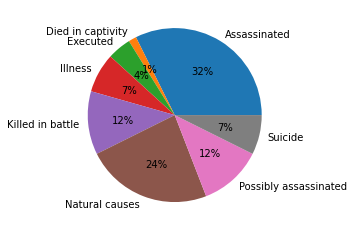

In [72]:
'''Question 9
Create a pie chart showing the fraction of all Roman Emperors that were
assassinated.

Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories.
'''
import pandas as pd 
import matplotlib.pyplot as plt


roman_emperors=pd.read_csv("roman-emperor-reigns.csv")

deaths=roman_emperors.groupby(roman_emperors["Cause_of_Death"]).Cause_of_Death.count()
deaths=list(num_of_deaths)


death_cause=['Assassinated','Died in captivity','Executed','Illness','Killed in battle','Natural causes','Possibly assassinated','Suicide']

plt.pie(deaths, labels = death_cause,autopct = '%0.0f%%')
plt.show()

#32% of the emperors were assassinated and 12% possibly


In [ ]:
'''Question 10
Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year.'''

import seaborn as sns
import pandas as pd
df = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv', header=0)

df = df[(df['Year']>=2000) & (df['Year']<=2009)]

#labels
ax = sns.scatterplot(x="Total Arcade Revenue (billions)",y="Computer Science Doctorates Awarded (US)", data=df)
ax.set_title("Total revenue earned by arcades vs Number of Computer Science PhDs awarded")


#best fit line
sns.lmplot(x="Total Arcade Revenue (billions)", y="Computer Science Doctorates Awarded (US)", data=df)

sns.scatterplot(x="Total Arcade Revenue (billions)", y="Computer Science Doctorates Awarded (US)", data=df)

#positive relationship
